# Create our very own image classification algorithm

Today we are going to have a look at how you can perform your own end to end image classification project. In many of your roles you may not think you have use cases for image classification, and that may be true however these are some examples of where it could be applied in an industry such as BP
- Satilitate images - oil spill detection
- Health and safety detection -  Is the person wearing a helmet or goggles?
- Enginnering component checks -  Automatically scan through pictures of equipment searching for cracks
- Satilite images for land use classification - If you are building a new pipeline based on your planned route can you estimate the cost based on the current land use?


I should note we are doing ***image classification** today. That is take an image and from the the pixel values in that image apply it to a category or class. There are more advanced image classification algroithms that look to segment every pixel in the image and applly that to a category

![classifciation](https://miro.medium.com/v2/resize:fit:1400/1*Hz6t-tokG1niaUfmcysusw.jpeg)


## Stages
1. Problem Statement
2. Collect images
3. Inspect images
4. Clean images
5. Use a simple Convolutional Neural Net Algorithm to train our data
6. Evaluate results
7. Test on a new image

### What are you classifying? 

In this workshop we are going to attempt to make an algorithm that will classify cars from lorrys from vans all from scratch. This could be a use case for BP. Knowing the proportion of vehicles at a locaiton could inform business strategy for example. 

I will also share with you a script that allows you to create a classifier on a topic you are more interested in

In [1]:
import keras
import tensorflow
import os
import random
from PIL import Image
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

print(keras.__version__)
print(tensorflow.__version__)

2.6.0
2.6.0


First we are going to select the data from the folders that contain the images we are using to train our network. The code below first identifies the path where the folders are stored. It then look for the names of all the folders in that directory and if they do not start with '.ipy' it adds them to a list of folders which contains our data. 

In [2]:
data_path = 'dataset/vehicles'
folders = []
for i in os.listdir(data_path):
    if not i.startswith('.ipy'):
        folders.append(i)
folders

['cars', 'trucks', 'vans']

We then look at how many images we have in each category

In [3]:
for folder in folders:
    files = os.listdir(os.path.join(data_path, folder))
    print('Number of images in ', str(folder), ' ', len(files))

Number of images in  cars   11751
Number of images in  trucks   1727
Number of images in  vans   2167


**WARNING** CLASS IMBALANCE

Class imbalance refers to a situation where the number of training examples in one or more classes is significantly smaller than the number of training examples in other classes. This can be a common problem in classification tasks where the classes are not equally represented in the dataset.

Class imbalance can be problematic because it can lead to a biased model that performs poorly on the minority class(es) or overfits to the majority class(es). For example, a classifier trained on a dataset with 90% positive examples and 10% negative examples may achieve a high accuracy by simply predicting all examples as positive, but this is not useful if the goal is to correctly identify the negative examples.

There are several ways to deal with class imbalance, including:

Collect more data: If possible, you can try to collect more data for the minority class(es) to balance the distribution.

Resample the data: You can either oversample the minority class(es) by duplicating existing examples or undersample the majority class(es) by randomly removing examples.

Use class weights: You can use class weights during training to give more importance to the minority class(es) and less importance to the majority class(es).

Use different evaluation metrics: Instead of using accuracy as the evaluation metric, you can use metrics such as precision, recall, F1-score, or area under the receiver operating characteristic curve (AUC-ROC) that are more appropriate for imbalanced datasets.

Use specialized algorithms: There are also specialized algorithms for imbalanced datasets, such as cost-sensitive learning, ensemble methods, or anomaly detection methods.

The choice of method will depend on the specific problem and the available resources, but it's important to recognize and address class imbalance in order to train a fair and accurate classifier.

**The quickest and easiest way to deal with this is to down sample the categories that have the larger class sizes**. Note in practise this wont be the best method, but for a quick demonstration it is fine

**Below** we set the images per class size to be the number of samples of our smallest category. We then reshape all our images to be the same size. In our case this will be 64 by 64. For higher resolution images you will use larger image sizes however this will signficantly increase training time and put demands on memory. We take a random selection of samples from our larger classes and load the images in so that we have a list of images X and a list of category names y.

**Note** For larger datasets it would not be recomended you store all the images in a list. Instead you should bring these images into your python environment perform whatever transformations you want to them as they get trained on the network, or write those images back to a image file format. The method below will only work for relatively small datasets due to limitations on RAM

In [4]:
images_per_class = 1727
target_image_size = (64, 64)
counter = 0
X = []
y = []
for folder in folders:
    files = os.listdir(os.path.join(data_path, folder))
    random_files = random.sample(files, images_per_class)
    for file in tqdm(random_files):
        im = Image.open(os.path.join(data_path, folder, file))
        im = im.resize(target_image_size)
        im = np.array(im)
        X.append(im)
        y.append(str(folder))

        
    


100%|██████████████████████████████████████████████████████████████████████████████| 1727/1727 [00:24<00:00, 71.25it/s]


We convert our list of images into matrix of images as below

In [5]:
X = np.array(X)
y = np.array(y)

Observe the shape of our matrix. It contains 5181 images each of 64 by 64 by 3 dimensions to represent 3 spatial dimensions and RGB channels 

!['rgb'](https://www.researchgate.net/profile/Bhupendra-Pratap-Singh/publication/282798184/figure/fig15/AS:283989639221249@1444719814399/Color-image-representation-and-RGB-matrix.png)

In [6]:
X.shape, y.shape

((5181, 64, 64, 3), (5181,))

Lets view our images with their labels. The code below takes an input as the approximate number of images you want to see. It then creates a subplot with approximately that many positions for images. We then load a random sample of images in for viewing

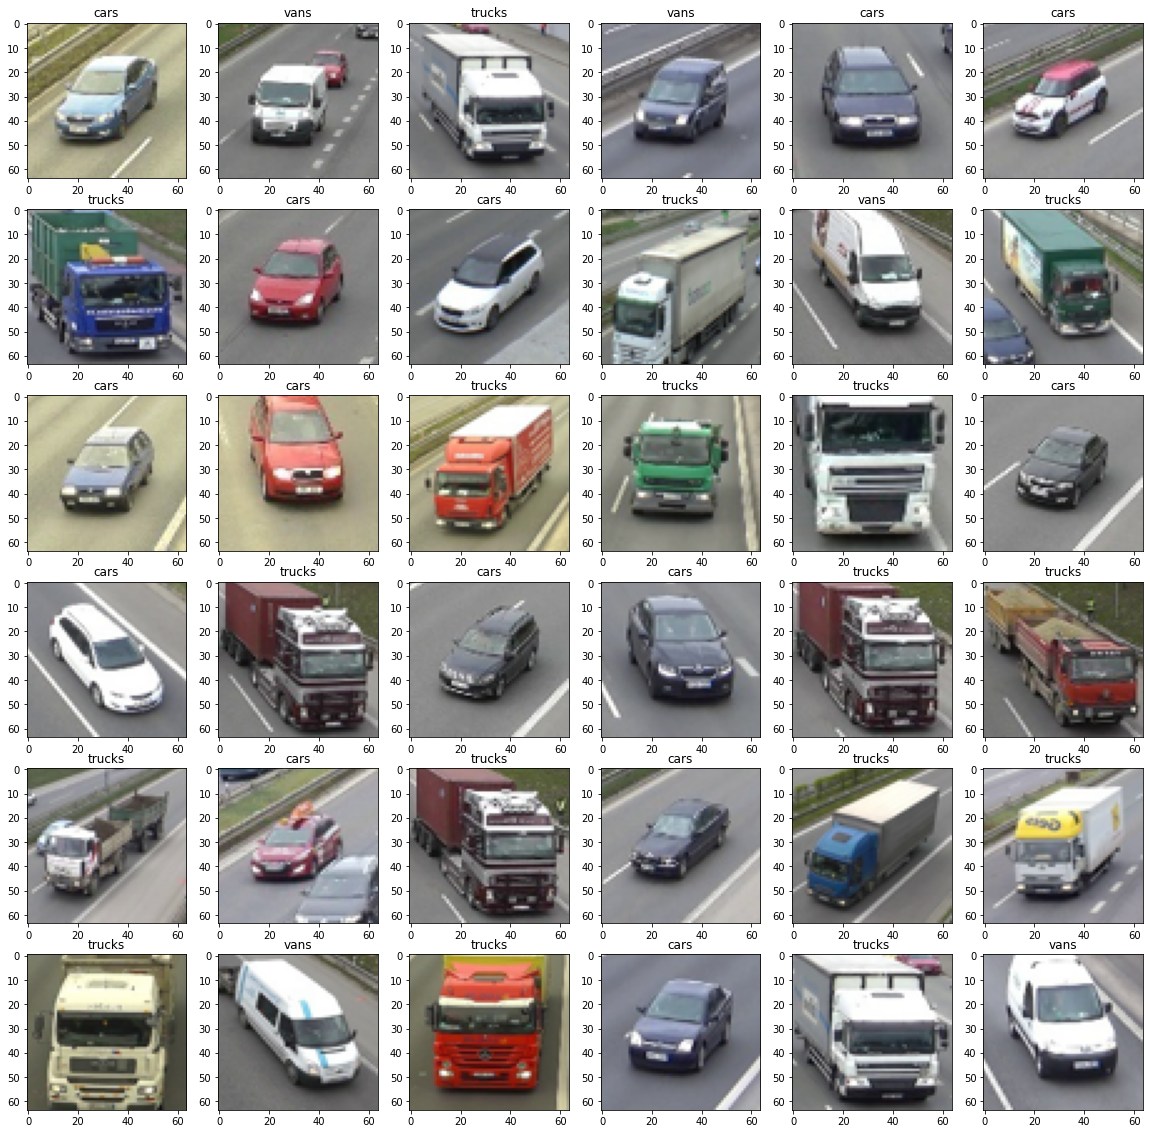

In [7]:
sample_images = 40
subplot_x, subplot_y = int(sample_images**0.5), int(sample_images**0.5)
image_num = 1
for i in range(int(subplot_x * subplot_y)):
    plt.subplot(subplot_x, subplot_y, image_num)
    num = random.randint(1, len(X))
    plt.imshow(X[num, :, :, :])
    plt.title(y[num])
    plt.axis('tight')
    image_num += 1

fig = plt.gcf()
fig.set_size_inches(20, 20)

### Can you spot an issues?






### The requirement of our netowork

<img src = "https://raw.githubusercontent.com/DrPBaksh/workshop-data/main/cnn_diagram_2.PNG"  width="700" height="500">


Our network needs to take a raw image of a vehcile and determine if it is a truck or a van or a car

**Encode category names** Many types (not all) of optimizer (the algorithm that will update our neural network) in a neural netowrk require the target to be in one hote encoded form. To do this we shall first create a mapping of strings to numbers and then one hot encode the numerical values

In [8]:


vehicle2label = {'cars':0, 'trucks':1, 'vans':2}
label2vehicle = {0: 'cars', 1: 'trucks', 2:'vans' }
y_encoded = pd.DataFrame(y).iloc[:, 0].map(vehicle2label).values
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

## Manual check that the encoding looks correct
rand_samp = [random.randint(0, len(y)) for i in range(10)]
print("One-hot encoded labels:")
samples_string = y[rand_samp]
samples_enc =y_onehot[rand_samp,:]
for i in range(len(samples_string)):
    print(samples_string[i], samples_enc[i])

NameError: name 'pd' is not defined

### Train Test Split 

We need to divide our data into training and testing data. In a bigger proect we may wish to divide into train test and validate data. 

In [ ]:

# assuming X is a numpy array of image data and y is a numpy array of labels
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# check the shape of the training and test sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Below are some functions that you dont need to worry about. They effectively allow us to view how the networks performance is improving as it trains itself. 


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

class AccuracyHistory(Callback):
    def __init__(self, plot_interval=3):
        super(AccuracyHistory, self).__init__()
        self.plot_interval = plot_interval
        self.accuracy = []
        self.val_accuracy = []

    def on_epoch_end(self, epoch, logs={}):
        self.accuracy.append(logs.get('accuracy'))
        self.val_accuracy.append(logs.get('val_accuracy'))
        if epoch % self.plot_interval == 0:
            plt.plot(self.accuracy, label='Training Accuracy')
            plt.plot(self.val_accuracy, label='Validation Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.show()

## Design are Convolution Neural Network !!

We use the following functions:

- Sequential. This is a function in the keras library that allows you to make Deep learning networks by adding a layer at a time. These layers are *Conv2 Maxpooling2D Flatten and Dense*. For image processing networks the most important layers are Conv2 The main building blocks of these netoworks are these convolution layers. These are layers in the network that *learn* the best filter for the given problem. Lets look at the diagram below for how this works.

Imagine you have a childs toy with various shapes. You have an idea of the types of shapes you may get and you need to make physical filters in order to identify shapes in to circles stars arrows and rectangles. Using your prior knowledge you may start of by designing a first layer of filters as shown below. These filters separate out the stars and the cicles from the square rectangle and arrow. You then have to make a further layer of filters to filter the rest down to each object. You are using your past knowledge of standard shapes to design these filters to the problem. In a CNN these layers / filters are learnt from the data 

<img src = "https://raw.githubusercontent.com/DrPBaksh/workshop-data/main/cnn_diagram_1.PNG"  width="500" height="400">

- Compile. This function collates these layers together. We then tell the network what algorithm we want it to use (optimizer) and how we want it to measure its error(loss). We then can tell the network what metric that we want our network evaluated against

- fit. Like scikit learn we then use a .fit method in order to train the network on the images. We tell the network how many times we want the data to go through the network (epoch) along with telling it the dataset to validate its performance. The call backs allows us to plot the accuracy 

The standard type of diagram that is used CNN netowrks is shown below

<img src = 'https://production-media.paperswithcode.com/method_collections/cnn.jpeg' width="500" height="400">






In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model to the training data and validate on the validation data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[AccuracyHistory(plot_interval=3)])



The graphs above show us how the training and testing accuracy are changing as we increase the number of times all the data is passed into the network (an epoch). We can see evidence of a small amount of overfitting which can be determined by the fact the testing accuracy is worse than the testing accuracy 

Lets evaluate our model

In [ ]:
# evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)



Lets make some plots of our predictions and how it has worked on our test images

In [ ]:
sample_images = 40
subplot_x, subplot_y = int(sample_images**0.5), int(sample_images**0.5)
image_num = 1
for i in range(int(subplot_x * subplot_y)):
    plt.subplot(subplot_x, subplot_y, image_num)
    num = random.randint(1, len(X_test))
    test_image = np.expand_dims(X_test[num-1, :, :, :], axis = 0)
    plt.imshow(X_test[num-1, :, :, :])
    model.predict(test_image)
    plt.title(label2vehicle[np.argwhere(y_test[num-1])[0][0]])
    plt.axis('tight')
    image_num += 1

fig = plt.gcf()
fig.set_size_inches(20, 20)

**Lets now evaluate how our image classifier has done**

In [ ]:
y_predictions = model.predict(X_test)
y_pred_classes = np.argmax(y_predictions, axis=1)

In [ ]:
y_pred = [label2vehicle[i] for i in y_pred_classes]
y_true = [label2vehicle[np.argmax(i) ]for i in y_test]
print(classification_report(y_true=true_name, y_pred=predict_name))

In [ ]:


class_names = ['cars', 'trucks', 'vans']
cm = confusion_matrix(true_name, predict_name)

# Plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names,
       yticklabels=class_names,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

## There it is....

Your own powerful image classification network using a deep learning algorithm. Now you can try on the other notebook trying to produce your own classifier from scraping google images